In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
data = pd.read_csv("/home/kiro04/Documents/robot_ws/i_robot_ws/data/house_price-train.csv")

In [57]:
print(data)
data.shape

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

(1460, 81)

In [58]:

non_numeric_columns = data.select_dtypes(exclude=np.number).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in non_numeric_columns:
    data[i] = label_encoder.fit_transform(data[i])

In [59]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
numeric_columns = data.select_dtypes(["int64","float64"]).columns
data[numeric_columns] = min_max_scaler.fit_transform(data[numeric_columns])
print(data)

            Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     0.000000    0.235294      0.75     0.150685  0.033420     1.0    1.0   
1     0.000685    0.000000      0.75     0.202055  0.038795     1.0    1.0   
2     0.001371    0.235294      0.75     0.160959  0.046507     1.0    1.0   
3     0.002056    0.294118      0.75     0.133562  0.038561     1.0    1.0   
4     0.002742    0.235294      0.75     0.215753  0.060576     1.0    1.0   
...        ...         ...       ...          ...       ...     ...    ...   
1455  0.997258    0.235294      0.75     0.140411  0.030929     1.0    1.0   
1456  0.997944    0.000000      0.75     0.219178  0.055505     1.0    1.0   
1457  0.998629    0.294118      0.75     0.154110  0.036187     1.0    1.0   
1458  0.999315    0.000000      0.75     0.160959  0.039342     1.0    1.0   
1459  1.000000    0.000000      0.75     0.184932  0.040370     1.0    1.0   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  

In [60]:
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64


In [66]:
data_filtered = data.loc[:,~data.columns.isin(["LotFrontage","GarageYrBlt","MasVnrArea"])]
print(data_filtered)

            Id  MSSubClass  MSZoning   LotArea  Street  Alley  LotShape  \
0     0.000000    0.235294      0.75  0.033420     1.0    1.0       1.0   
1     0.000685    0.000000      0.75  0.038795     1.0    1.0       1.0   
2     0.001371    0.235294      0.75  0.046507     1.0    1.0       0.0   
3     0.002056    0.294118      0.75  0.038561     1.0    1.0       0.0   
4     0.002742    0.235294      0.75  0.060576     1.0    1.0       0.0   
...        ...         ...       ...       ...     ...    ...       ...   
1455  0.997258    0.235294      0.75  0.030929     1.0    1.0       1.0   
1456  0.997944    0.000000      0.75  0.055505     1.0    1.0       1.0   
1457  0.998629    0.294118      0.75  0.036187     1.0    1.0       1.0   
1458  0.999315    0.000000      0.75  0.039342     1.0    1.0       1.0   
1459  1.000000    0.000000      0.75  0.040370     1.0    1.0       1.0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0             1.0        0

In [69]:
from sklearn.linear_model import LinearRegression

x_train = data_filtered.to_numpy(dtype=np.float32)[:1000,:-1]
y_train = data_filtered.to_numpy(dtype=np.float32)[:1000,-1]

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

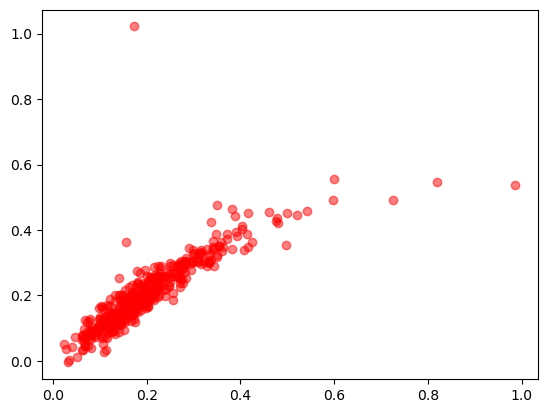

score= 0.7080829627345578


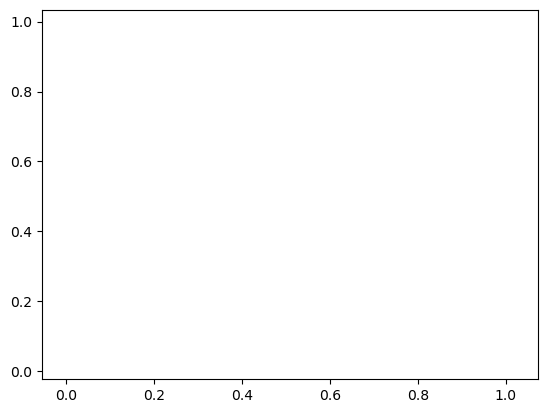

In [92]:
y_test = data_filtered.to_numpy(dtype = np.float32)[1000:,-1,np.newaxis]
y_predict = model.predict(x_test)
fig = plt.figure()
plt.scatter(y_test, y_predict, alpha=.5, c=['r'])
plt.show()
score = model.score(x_test, y_test)
print(f"score= {score}")
plt.scatter(y_predict, y_test, c= 'w')#착한 사람 눈에 만 보이는 그래프 * 작성자는 안착해서 안보임